In [63]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import tensorflow as tf
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import randint, loguniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import reciprocal, uniform
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from scipy.stats import randint as sp_randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import tensorflow as tf
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE , ADASYN
from collections import Counter
from scipy.stats import randint, loguniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import reciprocal, uniform
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Leitura dos dados

In [64]:
app_df = pd.read_csv('input/application_record.csv')
credit_df = pd.read_csv('input/credit_record.csv')

# "Fusão" dos dados de ambos os dataset, para obter o histórico de crédito

In [65]:
#Ordenação dos IDs
app_df = app_df.sort_values('ID')
credit_df = credit_df.sort_values('ID')
#Mapeamento do status como bom ou mau
credit_df['STATUS_BINARY'] = credit_df['STATUS']
credit_df = credit_df.replace({'STATUS_BINARY' :{'C' : 'Good','X' : 'Good','0' : 'Bad', '1' : 'Bad','2' : 'Bad','3' : 'Bad','4' : 'Bad','5' : 'Bad'}})
result_df = credit_df.value_counts(subset=['ID', 'STATUS_BINARY']).unstack(fill_value=0).reset_index()
#Decide se o utilizador é bom ou mau
result_df.loc[(result_df['Good'] / result_df['Bad'] >= 1), 'Status'] = 1
result_df.loc[(result_df['Good'] / result_df['Bad'] < 1 ), 'Status'] = 0
result_df['Status'] = result_df['Status'].astype(int)
df = app_df.merge(result_df, how='inner', on=['ID'])
#Definição da taxa de boas dívidas para cada utilizador
df['rate'] = (df['Good']+0.1) / (df['Bad']+0.1)
df.drop(['Good','Bad'],axis=1,inplace = True);
#Renomeação das colunas
df.columns = ['ID', 'Gender', 'Car', 'Realty', 'Children', 'Income', 'Income_Type',
                        'Education_Type', 'Family_Status', 'Housing_Type',  'Age', 'Years_Experience' , 'Mobile_Phone', 'Work_Phone', 
                        'Phone', 'Email', 'Job_Title', 'Total_Family' , 'Status','rate']
df.head(5)

,ID,Gender,Car,Realty,Children,Income,Income_Type,Education_Type,Family_Status,Housing_Type,Age,Years_Experience,Mobile_Phone,Work_Phone,Phone,Email,Job_Title,Total_Family,Status,rate
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,6.714286
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1,6.238095
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1,3.253521
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1.476190
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,51.000000


# Análise(Exploração dos dados) - Histórico de bons e maus clientes

<Axes: ylabel='Status'>

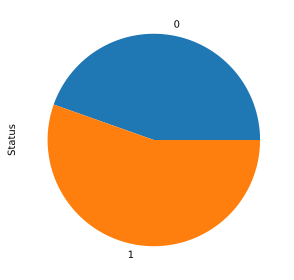

In [66]:
df.groupby('Status')['Status'].count().plot(kind='pie', y='Status')

## Quantidade de utilizadores por Género

<Axes: ylabel='Gender'>

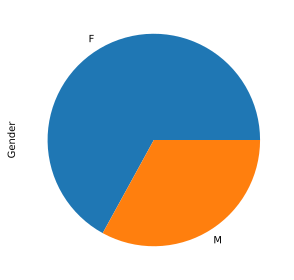

In [67]:
df.groupby('Gender')['Gender'].count().plot(kind='pie', y='Gender')

# Taxa do atributo "NAME_INCOME_TYPE"

<Axes: xlabel='Income_Type'>

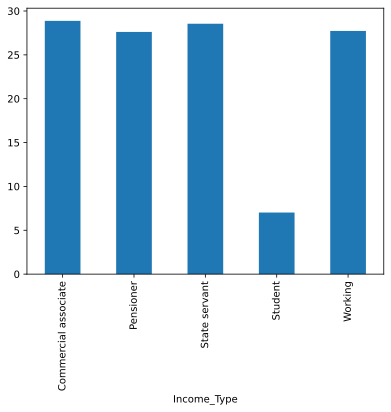

In [68]:
df.groupby('Income_Type')['rate'].mean().plot(kind = 'bar')

## Taxa do atributo "NAME_FAMILY_STATUS"

<Axes: xlabel='Family_Status'>

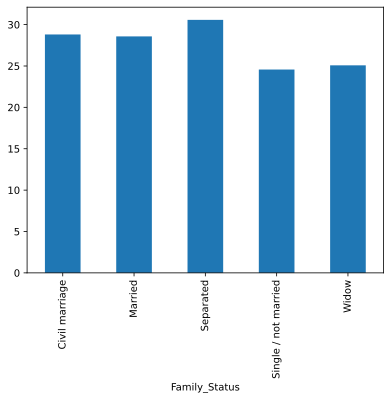

In [69]:
df.groupby('Family_Status')['rate'].mean().plot(kind = 'bar')

## Taxa de "FLAG_OWN_CAR"

<Axes: xlabel='Car'>

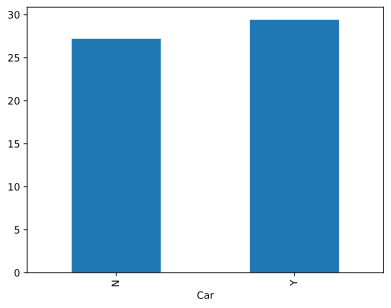

In [70]:
df.groupby('Car')['rate'].mean().plot(kind = 'bar')

## Taxa de "FLAG_OWN_REALTY"

<Axes: xlabel='Realty'>

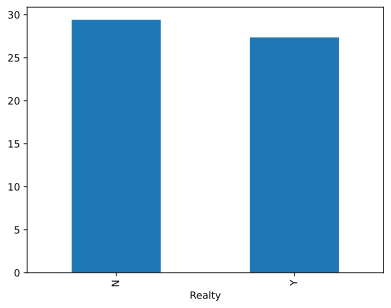

In [71]:
df.groupby('Realty')['rate'].mean().plot(kind = 'bar')

## Familia com 6/7 membros têm mais taxa

<Axes: xlabel='Total_Family'>

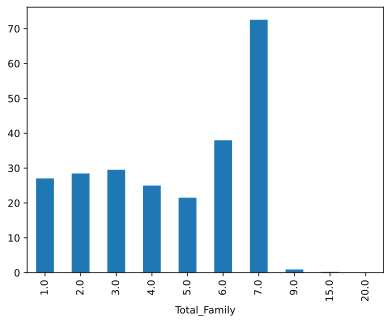

In [72]:
df.groupby('Total_Family')['rate'].mean().plot(kind = 'bar')

## Correlação dos dados

<Axes: >

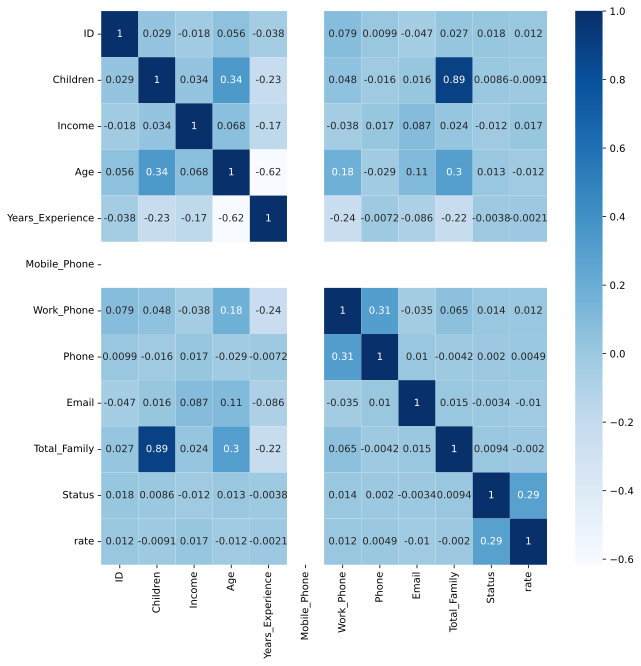

In [73]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

## Baseado no mapa de calor de correlação (Corr Heatmap)

**Vão ser removidas as crianças, devido á alta correlação com total_family e removeu-se também Mobile_Phone**

In [74]:
df.drop(['Children','Mobile_Phone'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                36457 non-null  int64  
 1   Gender            36457 non-null  object 
 2   Car               36457 non-null  object 
 3   Realty            36457 non-null  object 
 4   Income            36457 non-null  float64
 5   Income_Type       36457 non-null  object 
 6   Education_Type    36457 non-null  object 
 7   Family_Status     36457 non-null  object 
 8   Housing_Type      36457 non-null  object 
 9   Age               36457 non-null  int64  
 10  Years_Experience  36457 non-null  int64  
 11  Work_Phone        36457 non-null  int64  
 12  Phone             36457 non-null  int64  
 13  Email             36457 non-null  int64  
 14  Job_Title         25134 non-null  object 
 15  Total_Family      36457 non-null  float64
 16  Status            36457 non-null  int32 

<Axes: >

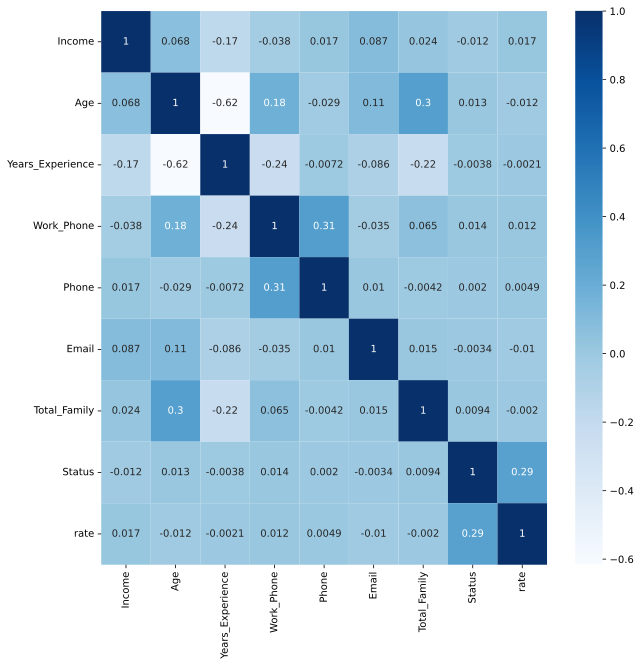

In [76]:
corr = df.drop('ID',axis=1).corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

**Como se pode observar a renda e a idade desempenham um grande fator**

# Pre-processamento

# Manipulação de valores ausentes

In [77]:
df.isna().sum()

ID                      0
Gender                  0
Car                     0
Realty                  0
Income                  0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Age                     0
Years_Experience        0
Work_Phone              0
Phone                   0
Email                   0
Job_Title           11323
Total_Family            0
Status                  0
rate                    0
dtype: int64

In [78]:
df = df.dropna()

# Manipulação de valores numéricos

**Conversão de age e Years_Experience no formato de ano**

In [79]:
df['Age'] = df['Age']/(-1*365)
df['Years_Experience'] = df['Years_Experience']/(-1*365)
df.head(5)

,ID,Gender,Car,Realty,Income,Income_Type,Education_Type,Family_Status,Housing_Type,Age,Years_Experience,Work_Phone,Phone,Email,Job_Title,Total_Family,Status,rate
2,5008806,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,0,0,0,Security staff,2.0,1,3.253521
3,5008808,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,1.476190
4,5008809,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,51.000000
5,5008810,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,3.459016
6,5008811,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,0,1,1,Sales staff,1.0,1,5.426230


# Manipulação de valores categóricos

**Label encoding**

In [80]:
Cat_features = ['Realty', 'Gender','Car','Income_Type','Education_Type','Family_Status','Housing_Type','Job_Title']

for col in Cat_features:
    print(df[col].unique())
    
df.info()

['Y' 'N']
['M' 'F']
['Y' 'N']
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25134 non-null  int64  
 1   Gender            25134 non-null  object 
 2   Car    

In [81]:
le = preprocessing.LabelEncoder()

for col in Cat_features:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25134 non-null  int64  
 1   Gender            25134 non-null  int32  
 2   Car               25134 non-null  int32  
 3   Realty            25134 non-null  int32  
 4   Income            25134 non-null  float64
 5   Income_Type       25134 non-null  int32  
 6   Education_Type    25134 non-null  int32  
 7   Family_Status     25134 non-null  int32  
 8   Housing_Type      25134 non-null  int32  
 9   Age               25134 non-null  float64
 10  Years_Experience  25134 non-null  float64
 11  Work_Phone        25134 non-null  int64  
 12  Phone             25134 non-null  int64  
 13  Email             25134 non-null  int64  
 14  Job_Title         25134 non-null  int32  
 15  Total_Family      25134 non-null  float64
 16  Status            25134 non-null  int32 

**Final data**

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25134.0,5.078838e+06,41941.018788,5.008806e+06,5.042228e+06,5.079004e+06,5.115604e+06,5.150487e+06
Gender,25134.0,3.781332e-01,0.484931,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Car,25134.0,4.183974e-01,0.493306,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Realty,25134.0,6.549296e-01,0.475401,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Income,25134.0,1.948339e+05,104510.987243,2.700000e+04,1.350000e+05,1.800000e+05,2.250000e+05,1.575000e+06
Income_Type,25134.0,2.681825e+00,1.773317,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
Education_Type,25134.0,3.060038e+00,1.358220,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
Family_Status,25134.0,1.316862e+00,0.893762,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Housing_Type,25134.0,1.322074e+00,1.016785,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
Age,25134.0,4.053161e+01,9.553342,2.051781e+01,3.277808e+01,3.985479e+01,4.777534e+01,6.742740e+01


# Divisão de teste de treino

In [83]:
from sklearn.model_selection import train_test_split
X = df.drop(['ID','Status'],axis = 1)
y = df['Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

# Over-sampling

In [84]:
sm = ADASYN()
X_train, y_train = sm.fit_resample(X_train,y_train)

# Transformação

In [85]:
power = PowerTransformer(method='yeo-johnson')
X_train = power.fit_transform(X_train)
X_val = power.fit_transform(X_val)

# Dimensionar

In [86]:
normalizer = preprocessing.StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_val = normalizer.fit_transform(X_val)

# Aprendizagem Máquina(ML)

# RandomForestClassifier

In [87]:
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)
print("Accuracy = " , accuracy_score(y_val, y_predict))
print("F1 = " , f1_score(y_val, y_predict))

Accuracy =  0.962204097871494
F1 =  0.9639605462822458


# XGBClassifier

In [88]:
model =  XGBClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_val)
print("Accuracy = " , accuracy_score(y_val, y_predict))
print("F1 = " , f1_score(y_val, y_predict))

Accuracy =  0.962204097871494
F1 =  0.9639605462822458


# SVMClassifier

In [89]:
model = SVC(C=1,gamma = 0.001)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)
print("Accuracy = " , accuracy_score(y_val, y_predict))
print("F1 = " , f1_score(y_val, y_predict))

Accuracy =  0.9822956037398051
F1 =  0.9835093570502131


# MLPClassifier

In [90]:
model = MLPClassifier(verbose = 0 , max_iter = 46 , random_state = 0)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)
print("Accuracy = " , accuracy_score(y_val, y_predict))
print("F1 = " , f1_score(y_val, y_predict))

Accuracy =  0.9962204097871494
F1 =  0.9965144010273345
